In [1]:
from astropy.table import  Table
def print_model(m):
    _comp = []
    _name = []
    _val = []
    _unit = []
    _err = []
    _froz = []
    colnames = ['component', 'par name', 'value', 'units', 'error', 'free']
    for model_name in m.componentNames:
        fit_model = getattr(m, model_name)
        for name in fit_model.parameterNames:
            p = getattr(fit_model, name)
            _comp.append('%s' % (model_name))
            _name.append('%s' % (p.name))
            _val.append('%5.5f' % p.values[0])
            _unit.append('%s' % p.unit)
            _err.append('%5.5f' % p.sigma)
            _froz.append('%s' % p.frozen)

    t=Table([_comp, _name, _val, _unit, _err, _froz],names=colnames)
    print(t)

In [2]:
import shutil
from IPython.display import Image
from IPython.display import display 
def plot_spectrum():
    xsp.Plot.device="/png"
    #xspec.Plot.addCommand("setplot en")
    xsp.Plot.xAxis="keV"
    xsp.Plot("euf del")
    xsp.Plot.device="/png"

    fn="test.png"



    shutil.move("pgplot.png_2", fn)

    _=display(Image(filename=fn,format="png"))

In [3]:
def get_stats():
    chi2_red=xsp.Fit.statistic/xsp.Fit.dof
    chi2=xsp.Fit.statistic
    ndof=xsp.Fit.dof
    
    return chi2_red, chi2, ndof

In [4]:
from future import *
import pprint
import xspec as xsp
xsp.Xset.allowPrompting 
xsp.AllModels.clear()
xsp.AllData.clear()
xsp.AllChains.clear()

s = xsp.Spectrum('data/spec.fits')

s.response = 'data/rmf.fits'
s.response.arf = 'data/arf.fits'

s.ignore('**-15')
s.ignore('300-**')
xsp.AllData.ignore('bad')

model_name = 'wabs*po'

m = xsp.Model(model_name)



ImportError: No module named future

In [92]:
print_model(m)

component par name  value  units  error 
--------- -------- ------- ----- -------
     wabs       nH 1.00000 10^22 0.00000
 powerlaw PhoIndex 1.00000       0.00000
 powerlaw     norm 1.00000       0.00000


In [93]:
xsp.Fit.query = 'yes'
xsp.Fit.perform()

In [94]:
print_model(m)

component par name  value   units  error  
--------- -------- -------- ----- --------
     wabs       nH  0.00004 10^22 -1.00000
 powerlaw PhoIndex  3.35376        0.35829
 powerlaw     norm 59.31030       76.31400


In [95]:
chi2_red, chi2, ndof =get_stats()
print('chi_red',chi2_red)
print('chi',chi2)
print('ndof',ndof)

('chi_red', 1.0906180778878924)
('chi', 47.98719542706727)
('ndof', 44)


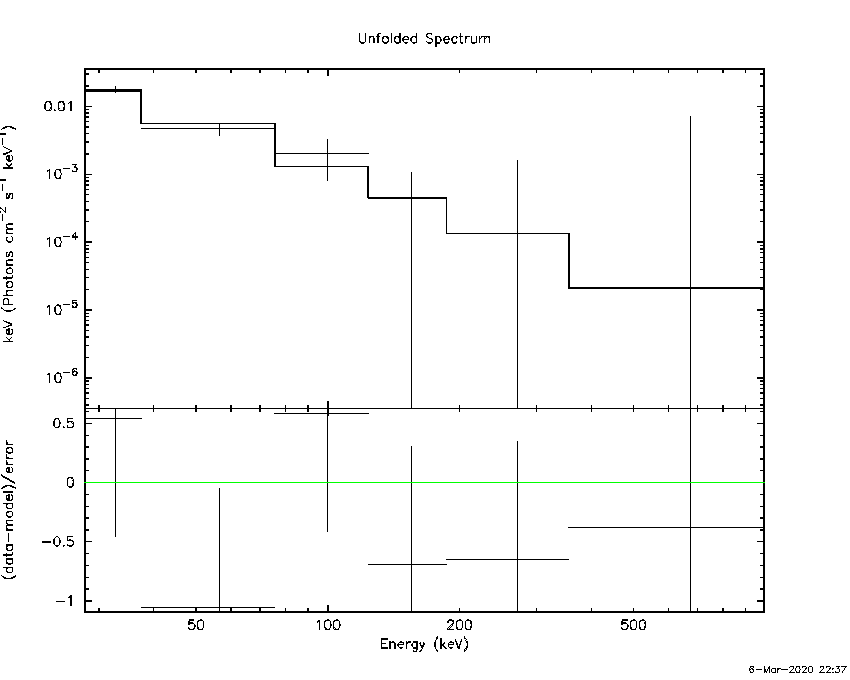

In [96]:
plot_spectrum()

In [ ]:
de